## Importing Required Libaries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## Loading the dataset and displaying first 5 rows

In [22]:
data = pd.read_csv('Heart Disease Data.csv')
data.head(5)

,ID,General_Health,Checkup,Exercise,Heart_Disease,Diet_Pref,Skin_Cancer,Other_Cancer,Depression,Vaccinated,...,Height_(cm),Martial_status,Weight_(kg),BMI,Smoking_History,Blood_gp,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,Friedfood_consumption
0,1.0,Poor,Within the past 2 years,No,No,Non Veg,No,No,No,1.0,...,150.0,1.0,32.66,14.54,Yes,A,0.0,30.0,16.0,12.0
1,1.0,Very Good,Within the past year,No,Yes,Veg,No,No,No,1.0,...,165.0,1.0,77.11,28.29,No,NaN,0.0,30.0,0.0,4.0
2,3.0,Very Good,Within the past year,Yes,No,Veg,No,No,No,1.0,...,163.0,1.0,88.45,33.47,No,O,4.0,12.0,3.0,16.0
3,4.0,Poor,Within the past year,Yes,Yes,Veg,No,No,No,1.0,...,180.0,1.0,93.44,28.73,No,NaN,0.0,30.0,30.0,8.0
4,5.0,Good,Within the past year,No,No,Non Veg,No,No,No,1.0,...,191.0,1.0,88.45,24.37,Yes,B,0.0,8.0,4.0,0.0


## Data description:


| **Column Name**           | **Data Type** | **Description**                                                               |
|---------------------------|---------------|-------------------------------------------------------------------------------|
| ID                        | Int           | Identifier                                                                    |
| General Health            | Object        | General health rating of individuals (e.g., excellent, good, poor)            |
| Checkup                   | Object        | Frequency of medical checkups                                                 |
| Exercise                  | Object        | Indicator of whether the individual exercises regularly (e.g., Yes, No)       |
| Heart Disease             | Object        | Target variable indicating the presence of heart disease (e.g., Yes, No)      |
| Skin Cancer               | Object        | Indicator of whether the individual has skin cancer (e.g., Yes, No)           |
| Other Cancer              | Object        | Indicator of whether the individual has other types of cancer (e.g., Yes, No) |
| Depression                | Object        | Indicator of whether the individual has been diagnosed with depression        |
| Diabetes                  | Object        | Indicator of whether the individual has diabetes (e.g., Yes, No)              |
| Arthritis                 | Object        | Indicator of whether one has arthritis (e.g., Yes, No)                        |
| Sex                       | Object        | Sex of the individual (e.g., Male, Female)                                    |
| Age Category              | Object        | Categorical representation of age groups (e.g., 18-24, 25-34)                 |
| Height (cm)               | float64       | Height of the individual in centimeters                                       |
| Weight (kg)               | float64       | Weight of the individual in kilograms                                         |
| BMI                       | float64       | Body mass index of the individual                                             |
| Smoking History           | Object        | History of smoking (e.g., current, former, never)                             |
| Alcohol consumption       | float64       | Amount of alcohol consumed                                                    |
| Fruit consumption         | float64       | Frequency of fruit consumption                                                |
| Green vegetable consumption | float64     | Frequency of green vegetable consumption                                      |
| Fried potato consumption  | float64       | Frequency of fried potato consumption                                         |
| BP                        | Object        | Blood pressure of the individual (e.g., 0- Normal BP, 1- Abnormal BP)         |
| Blood group               | Object        | The blood group of the individual (e.g., A, B, O)                             |
| Vaccinated                | Object        | Whether the individual is vaccinated or not (e.g., 0- No, 1- Yes)             |
| Marital Status            | Object        | Whether the individual is married or not (e.g., 0-Divorced/Single, 1-Married) |
| Diet Preference           | Object        | Diet preference of the individual (e.g., Veg, Non-Veg)                        |


## Analyzing the columns

In [23]:
data.ID.value_counts()

ID
307049.0    3
11.0        3
306802.0    3
306804.0    3
307039.0    3
           ..
102954.0    1
102953.0    1
102952.0    1
102951.0    1
308853.0    1
Name: count, Length: 308849, dtype: int64

In [24]:
data.drop(columns = 'ID', inplace = True)

Since ID column is not a unique identifier hence we drop it.

Columns mentioned in the list are categories but assigned data type float which is now changed to object

### Exploring the Target column

In [25]:
data['Heart_Disease'].value_counts(normalize=True)

Heart_Disease
No     0.919143
Yes    0.080857
Name: proportion, dtype: float64

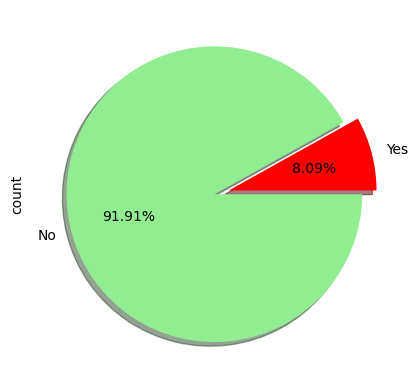

In [26]:
data['Heart_Disease'].value_counts().plot(kind='pie',colors=['lightgreen','red'],autopct='%.2f%%',
                                               counterclock=False,startangle=0,explode=[0,0.1],shadow=True)
plt.show()

There are only 8% of individuals who suffers from heart disease

## Checking the shape of the data

In [27]:
print(f'Number of Rows: {data.shape[0]}')
print(f'Number of Columns: {data.shape[1]}')

Number of Rows: 308867
Number of Columns: 24


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308867 entries, 0 to 308866
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308865 non-null  object 
 1   Checkup                       308865 non-null  object 
 2   Exercise                      308865 non-null  object 
 3   Heart_Disease                 308865 non-null  object 
 4   Diet_Pref                     308865 non-null  object 
 5   Skin_Cancer                   308865 non-null  object 
 6   Other_Cancer                  308865 non-null  object 
 7   Depression                    308865 non-null  object 
 8   Vaccinated                    308865 non-null  float64
 9   Diabetes                      308865 non-null  object 
 10  Arthritis                     308865 non-null  object 
 11  Sex                           308865 non-null  object 
 12  Age_Category                  308865 non-nul

There are null values in columns BP and Blood_gp which we will treat later on

## Descriptive Statistics

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Vaccinated,308865.0,0.543390,0.498115,0.00,0.00,1.00,1.00,1.00
Height_(cm),308865.0,170.615087,10.658090,91.00,163.00,170.00,178.00,241.00
Martial_status,308865.0,0.543390,0.498115,0.00,0.00,1.00,1.00,1.00
Weight_(kg),308865.0,83.588362,21.343139,24.95,68.04,81.65,95.25,293.02
BMI,308865.0,28.626171,6.522365,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308865.0,5.096201,8.199666,0.00,0.00,1.00,6.00,30.00
Fruit_Consumption,308865.0,29.834886,24.875397,0.00,12.00,30.00,30.00,120.00
Green_Vegetables_Consumption,308865.0,15.110462,14.926008,0.00,4.00,12.00,20.00,128.00
Friedfood_consumption,308865.0,6.296401,8.582876,0.00,2.00,4.00,8.00,128.00


Inferences:
1. There are individuals with max height of 241 cm and min height of 91 cm.
2. There are individuals who are highly low weight and also heavy weight.
3. The avgerage BMI if 28.62 which falls under overweight category.

In [30]:
data.describe(include=object)

,General_Health,Checkup,Exercise,Heart_Disease,Diet_Pref,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BP,Smoking_History,Blood_gp
count,308865,308865,308865,308865,308865,308865,308865,308865,308865,308865,308865,308865,292007,308865,212647
unique,5,5,2,2,2,2,2,2,4,2,2,13,5,2,3
top,Very Good,Within the past year,Yes,No,Veg,No,No,No,No,No,Female,65-69,0,No,O
freq,110394,239380,239387,283891,184359,278871,278987,246963,259142,207785,160203,33434,149894,183594,124046


Inferences:
1. Around 33% of individuals present in the data set has very good general health.
2. More that 50% got their checkup done within a year are exercise regulary.
3. Data has equal distribution of males and females.

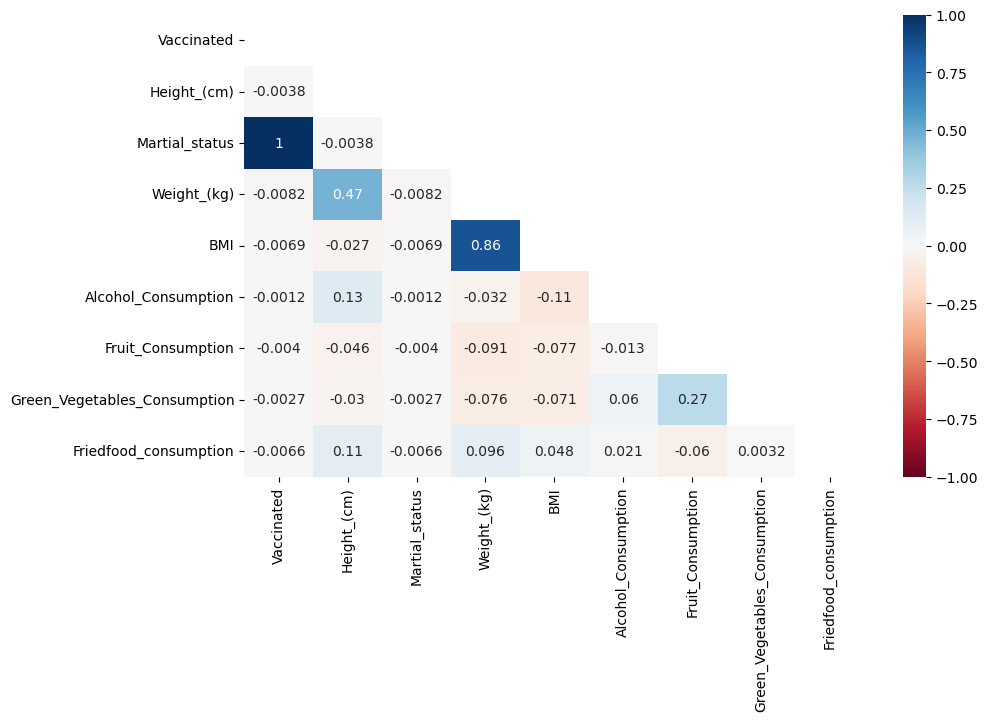

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(np.number).corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True,
            mask=np.triu(data.select_dtypes(np.number).corr()))
plt.show()

Inferences:
1. There is a corrleation between weight and BMI

## Data Preprocessing

### Checking for Duplicates & Treating

In [32]:
data.duplicated().sum()

33

In [33]:
data.drop_duplicates(inplace=True)

In [34]:
data.duplicated().sum()

0

### Checking for Null/Missing Values & Treating

In [35]:
data.isnull().sum()

General_Health                      1
Checkup                             1
Exercise                            1
Heart_Disease                       1
Diet_Pref                           1
Skin_Cancer                         1
Other_Cancer                        1
Depression                          1
Vaccinated                          1
Diabetes                            1
Arthritis                           1
Sex                                 1
Age_Category                        1
BP                              16851
Height_(cm)                         1
Martial_status                      1
Weight_(kg)                         1
BMI                                 1
Smoking_History                     1
Blood_gp                        96210
Alcohol_Consumption                 1
Fruit_Consumption                   1
Green_Vegetables_Consumption        1
Friedfood_consumption               1
dtype: int64

In [36]:
data.dropna(how='all',inplace=True)

In [37]:
#exploring the columns 1 by 1
num_cols = ['Height_(cm)','Weight_(kg)', 'BMI']

cat_cols = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Diet_Pref','Skin_Cancer', 'Other_Cancer', 'Depression',
            'Vaccinated', 'Diabetes','Arthritis', 'Sex', 'Age_Category', 'BP','Martial_status','Smoking_History', 'Blood_gp',
            'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption', 'Friedfood_consumption']

## Univariate Analysis

### Numerical Columns

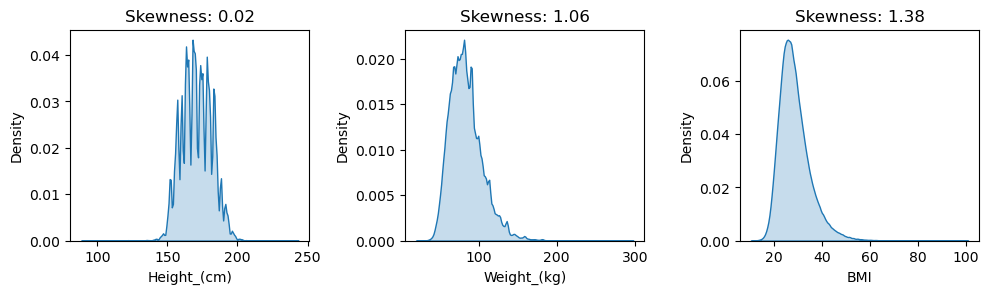

In [38]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

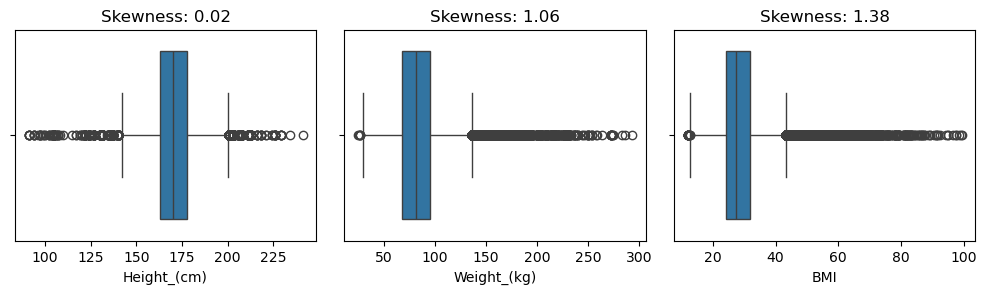

In [39]:
t=1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,fill=True)
    plt.title(f'Skewness: {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

Inferences:
1. The data follows a normal distribution but there is moderate positive skewness in columns like weight and BMI.
2. The Box plot shows there might be outliers but the density flow says that they might not be outliers.

### Categorical Columns

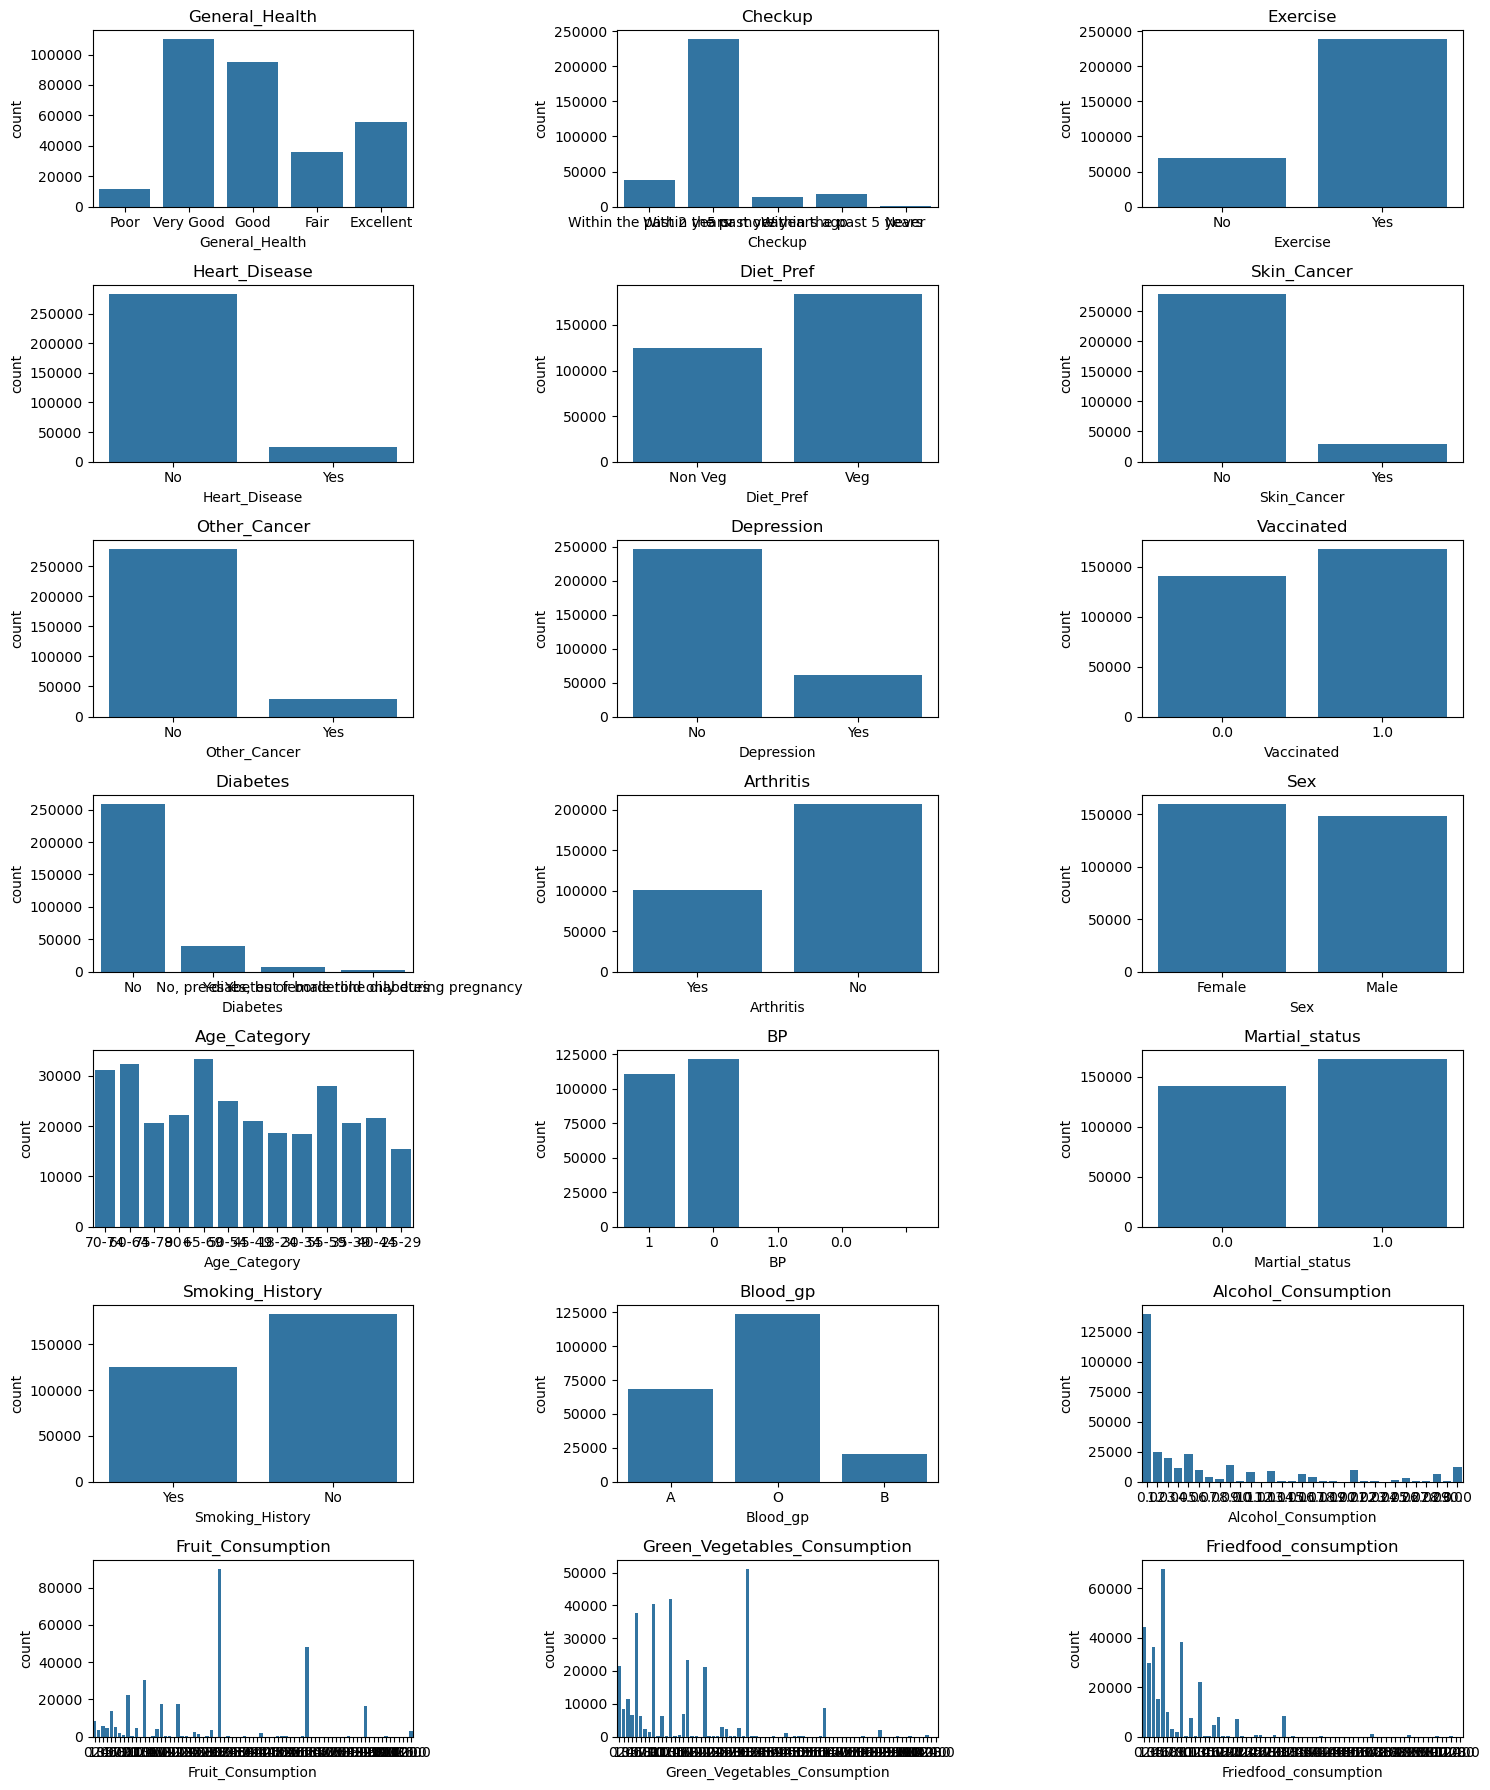

In [40]:
t=1
plt.figure(figsize=(15,18))
for i in cat_cols:
    plt.subplot(7,3,t)
    sns.countplot(data=data,x=i)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

Inferences:
1. Most individuals report fair or good general health and very few has poor health.
2. There are more individuals who have had a checkup within a year compared to those who have not.
3. Most individuals do not exercise regularly.
4. A majority of individuals prefer vegetarian food.
5. Most individuals do not have skin cancer or other types of cancer.
6. A large majority of individuals do not have depression and also do not have diabetes.
7. A majority of individuals do not smoke.
8. The distribution of blood groups appears to be relatively even with blood group O being majority.

## Bivariate Analysis

### Numerical Columns

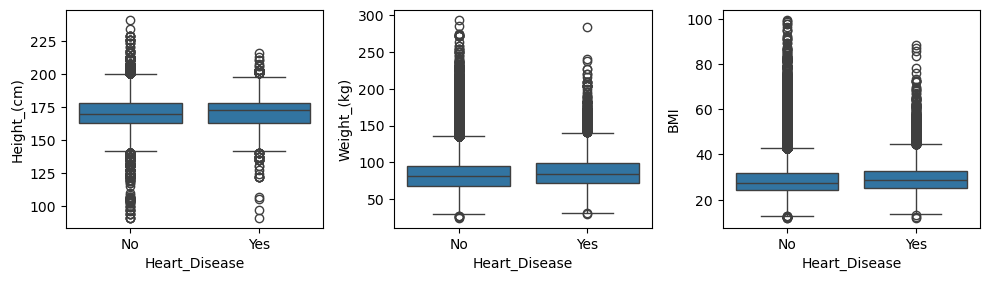

In [41]:
# Lets see the effect of num cols on target column Heart_Disease
t = 1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,y=i,x='Heart_Disease')
    t+=1
plt.tight_layout()
plt.show()

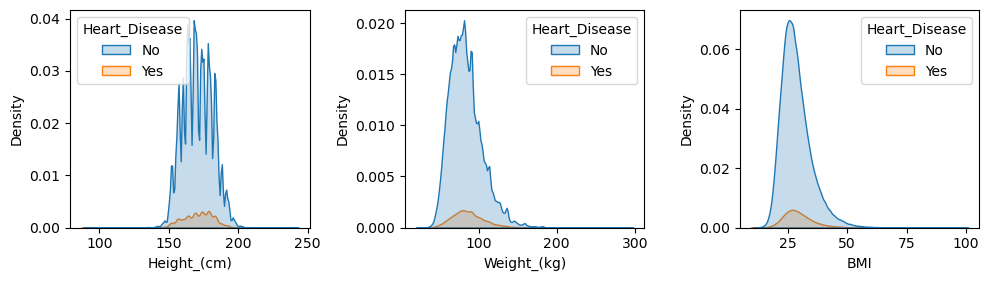

In [42]:
t = 1
plt.figure(figsize=(10,8))
for i in num_cols:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,hue='Heart_Disease',fill=True)
    t+=1
plt.tight_layout()
plt.show()

Inferences:
1. The distribution of heights appears to be similar between individuals with and without heart disease.
2. There is a slight suggestion that individuals with heart disease might have a slightly lower median height, but the difference is not very pronounced.
3. Individuals with heart disease seem to have a higher median weight compared to those without heart disease.
4. Similar to weight, individuals with heart disease tend to have a higher median BMI compared to those without heart disease.

In [43]:
#Lets investigate BMI with Heart_Disease
data.groupby(by='Heart_Disease')['BMI'].mean()

Heart_Disease
No     28.543804
Yes    29.564488
Name: BMI, dtype: float64

In [44]:
samp1 = data[data['Heart_Disease']=='No']['BMI']
samp2 = data[data['Heart_Disease']=='Yes']['BMI']

In [45]:
# We will go with 2 sample t-test
#Assumption 1 : Data must be normal
print(stats.shapiro(samp1))
print(stats.shapiro(samp2))
#Assumption 2 : Population Variance are equal
print(stats.levene(samp1,samp2))

#Since both the assumptions fail, data is not normal and variance is also not equal
#so we go with non-parametric test i.e. Mannwhitneyu test

print(stats.mannwhitneyu(samp1,samp2,alternative='greater'))

ShapiroResult(statistic=0.9228716819708214, pvalue=4.217872782906935e-126)
ShapiroResult(statistic=0.9371411798541903, pvalue=2.2722757375038587e-71)
LeveneResult(statistic=8.142112548598238, pvalue=0.004325174214974709)
MannwhitneyuResult(statistic=3166018987.0, pvalue=1.0)


In [46]:
pvalue = stats.mannwhitneyu(samp1,samp2,alternative='greater')[1]

if pvalue < 0.05:
    print('Reject Ho:')
else:
    print('Fail to reject Ho:')
        

Fail to reject Ho:


Conclusion: With 95% confidence we can say that sample drawn from this population will have more heart disease for individuals with high bmi than for individuals with low bmi

### Categorical Columns

<Figure size 1000x800 with 0 Axes>

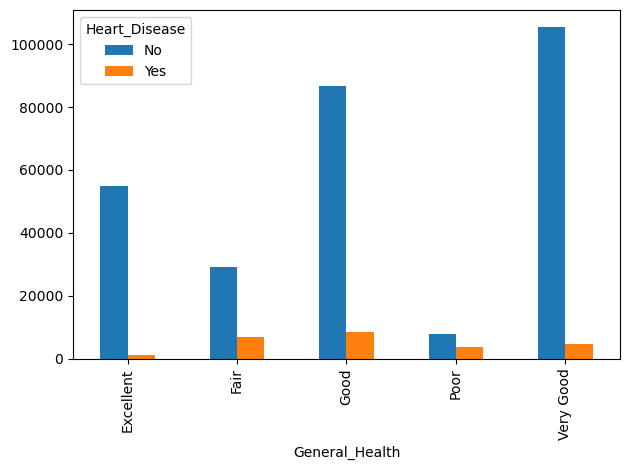

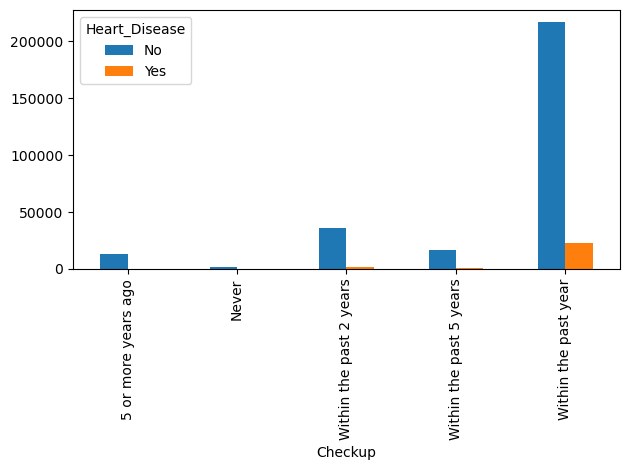

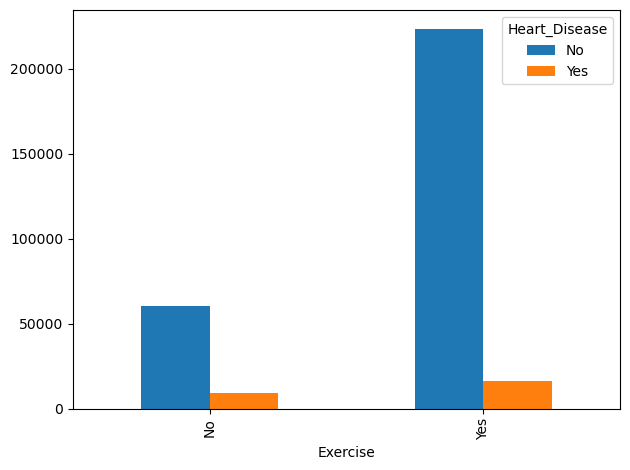

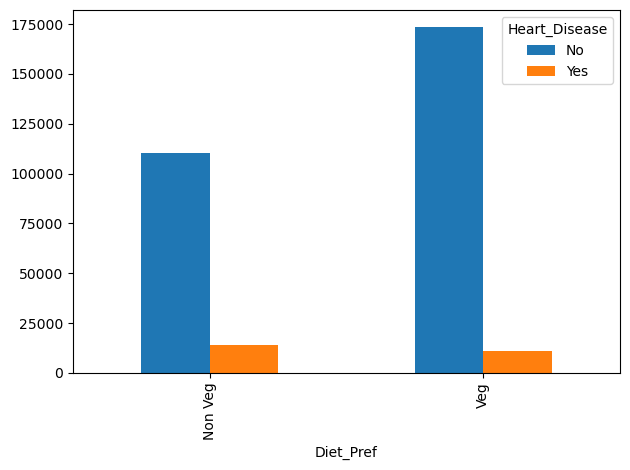

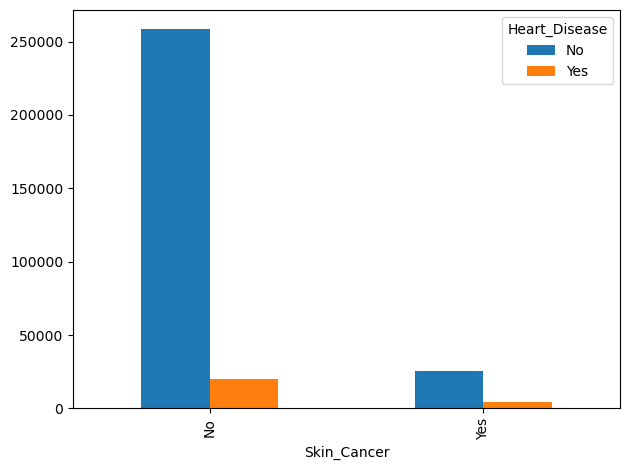

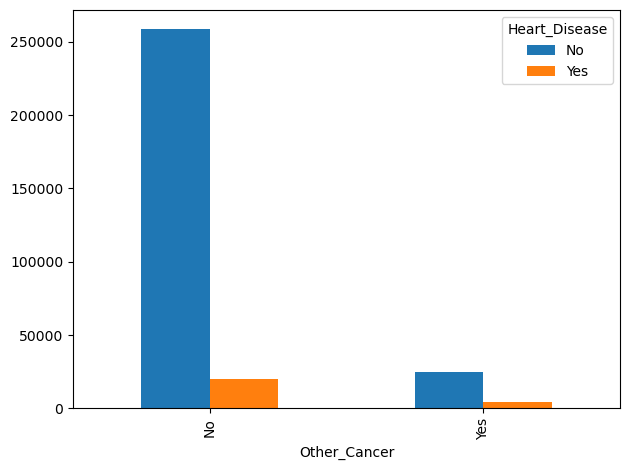

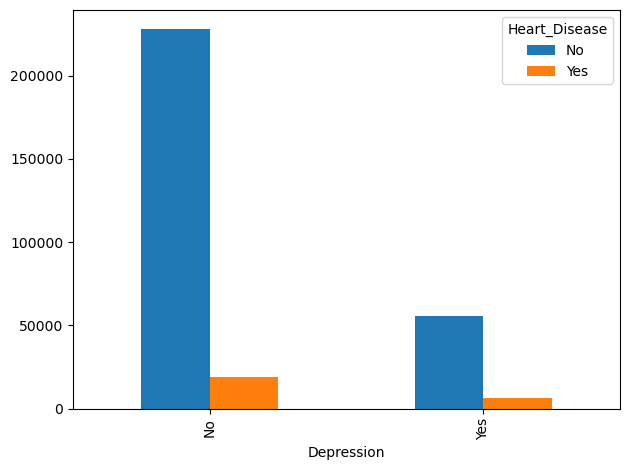

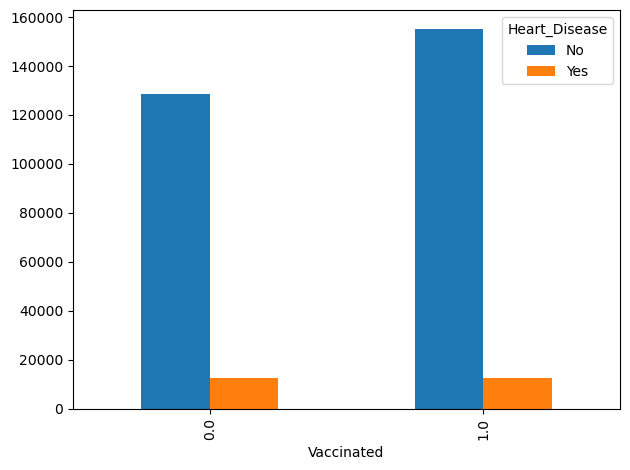

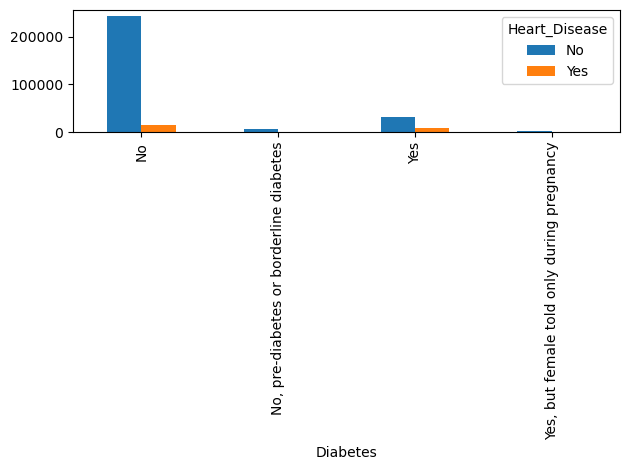

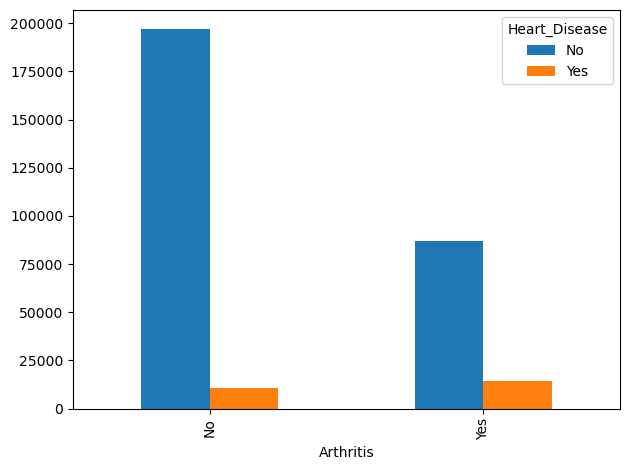

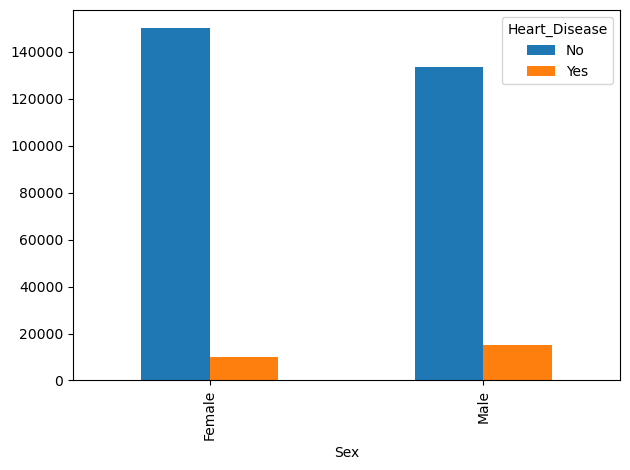

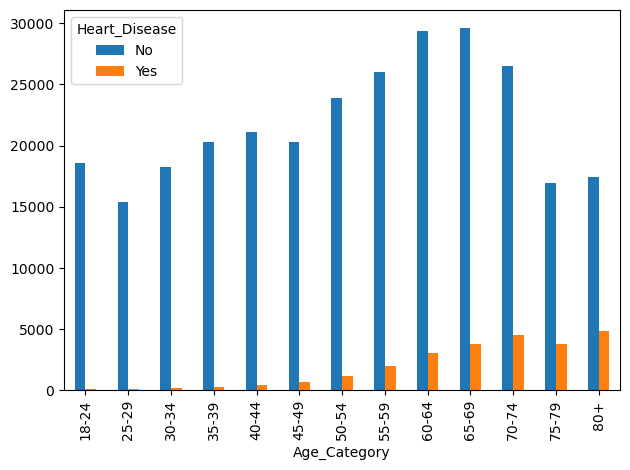

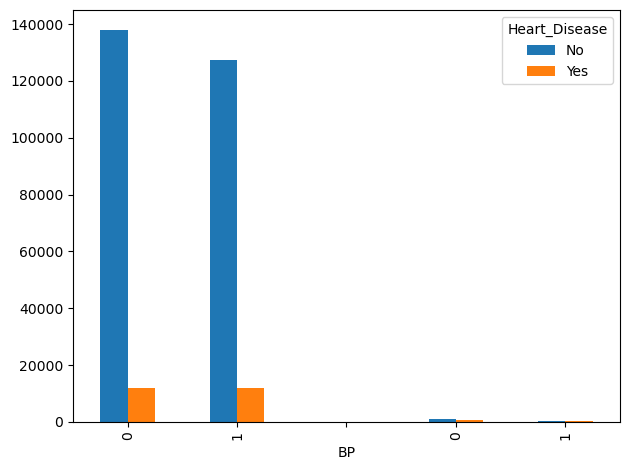

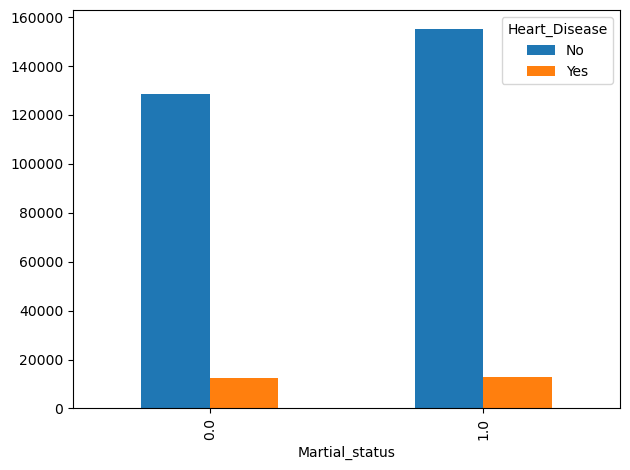

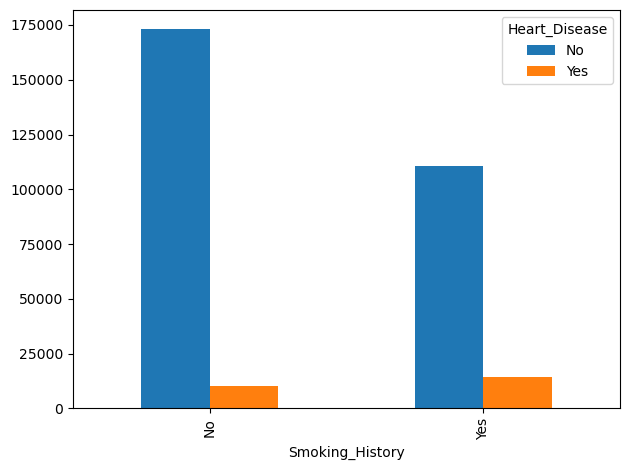

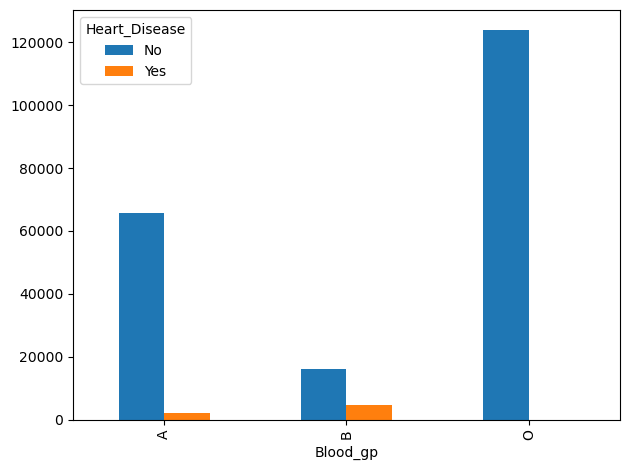

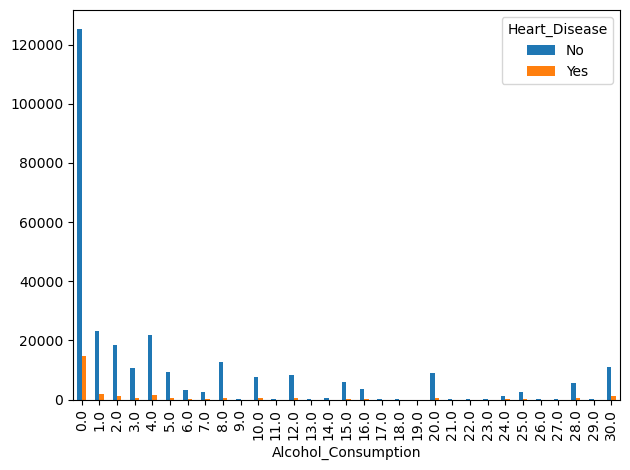

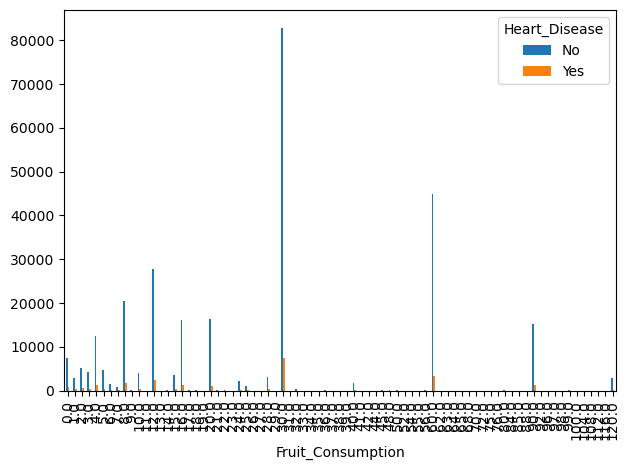

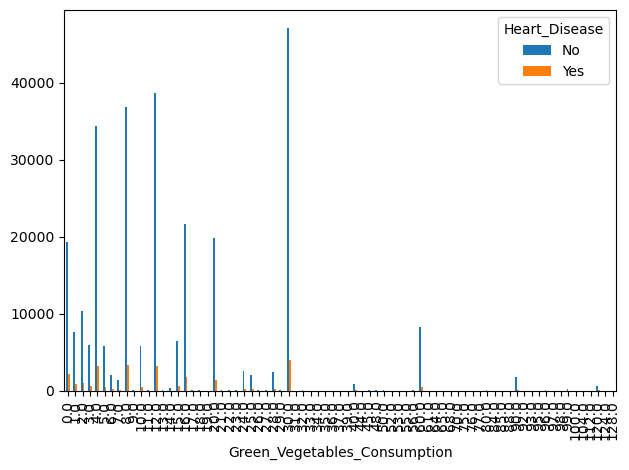

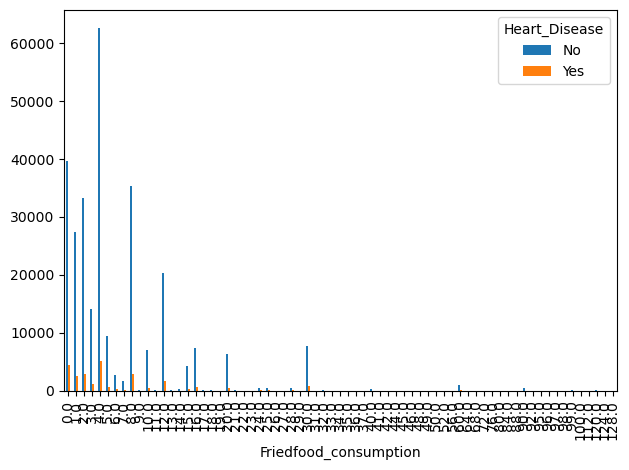

In [47]:

plt.figure(figsize=(10,8))
t=1
for i in cat_cols:
    if i != 'Heart_Disease':
        pd.crosstab(data[i],data['Heart_Disease']).plot(kind='bar')
        plt.tight_layout()
        plt.show()

Inferences:
1. As general health declines (from Excellent to Poor), the proportion of individuals with heart disease increases.
2. The chart shows a clear trend that individuals who have not had a checkup in a long time (5 or more years ago or never) have a higher proportion of heart disease compared to those who have had a checkup more recently.
3. The chart clearly shows that individuals who do not exercise regularly have a significantly higher proportion of heart disease compared to those who do exercise.
4. Individuals with a "Non-Veg" diet preference have a significantly higher proportion of heart disease compared to those with a "Veg" diet preference.
5. Individuals being vaccinated or not does not increases their chances of having a heart disease.
6. 6. The chart shows that male tends to suffer from heart disease more than females.

In [48]:
#Lets do chi-square contingency test for independence to make final conclusions 
#H0: Columns are independent 
#Ha: Columns are dependent


for i in cat_cols:
    if i != 'booking_status':
        contingency_table = pd.crosstab(data[i],data['Heart_Disease'])
        print(f'{i} , Pvalue : {stats.chi2_contingency(contingency_table)[1]}')
print('\n')    
pvalue = stats.chi2_contingency(contingency_table)[1]
if pvalue < 0.05:
    print('Reject H0: ')
else:
    print('Fail to reject H0: ')

General_Health , Pvalue : 0.0
Checkup , Pvalue : 0.0
Exercise , Pvalue : 0.0
Heart_Disease , Pvalue : 0.0
Diet_Pref , Pvalue : 0.0
Skin_Cancer , Pvalue : 0.0
Other_Cancer , Pvalue : 0.0
Depression , Pvalue : 5.805832862546712e-73
Vaccinated , Pvalue : 3.798826854735263e-33
Diabetes , Pvalue : 0.0
Arthritis , Pvalue : 0.0
Sex , Pvalue : 0.0
Age_Category , Pvalue : 0.0
BP , Pvalue : 0.0
Martial_status , Pvalue : 3.798826854735263e-33
Smoking_History , Pvalue : 0.0
Blood_gp , Pvalue : 0.0
Alcohol_Consumption , Pvalue : 0.0
Fruit_Consumption , Pvalue : 3.170447946900927e-54
Green_Vegetables_Consumption , Pvalue : 2.02476843209371e-51
Friedfood_consumption , Pvalue : 1.4117590048046084e-59


Reject H0: 


Inference:
Target variable is affected by all the categorical columns.
We have good relation in the data we can have good predictions in the data

### Feature Encoding

In [49]:
data['Checkup'] = data['Checkup'].apply(lambda x: 0 if x=='Never' else 1 if x=='Within the past year' else 2 if 
                                        x=='Within the past 2 years' else 3 if x=='Within the past 5 years' else 4)
                                        
data['Diabetes'] = data['Diabetes'].apply(lambda x: 0 if x=='No'or x=='No, pre-diabetes or borderline diabetes' else 1)
data['Blood_gp']=data['Blood_gp'].apply(lambda x: 0 if x=='O' else 1 if x=='B' else 2 )
data['General_Health'] = data['General_Health'].apply(lambda x:0 if x=='Poor' else 1 if x == 'Fair' else 2 if x=='Good' else
                                                      3 if x=='Very Good' else 4)
                                    
cols = ['Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','Friedfood_consumption']
for i in cols:
    data[i] = data[i].apply(lambda x: '1' if x==1 else '2' if x==2 else '3' if x==3 else '4' if x==4 else '5')

In [50]:
col = ['Vaccinated','Exercise', 'Diet_Pref','Skin_Cancer', 'Other_Cancer', 'Depression','Smoking_History','Arthritis', 'Sex']
for i in col:
    data=pd.get_dummies(data,columns=[i],drop_first=True,dtype=int)

In [51]:
age_mapping = {'18-24': 0, '25-29': 0, '30-34': 1, '35-39': 1, '40-44': 1,
               '45-49': 1, '50-54': 2, '55-59': 2, '60-64': 2, '65-69': 2,
               '70-74': 2, '75-79': 2, '80+': 2}
data['Age_Category_Encoded'] = data['Age_Category'].map(age_mapping)

In [52]:
data.drop(columns='Age_Category',inplace=True)

In [53]:
data.drop(columns='BP',inplace=True)

In [54]:
cols = ['Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','Friedfood_consumption']
for i in cols:
    data[i] = data[i].astype(int)

### Feature Scaling

In [55]:
scaler = StandardScaler()
data[['Height_(cm)','Weight_(kg)','BMI']] = scaler.fit_transform(data[['Height_(cm)','Weight_(kg)','BMI']])

### Splitting the data into train and test

In [56]:
#Lets Split the data into Train and Test before we do any transformation
x = data.drop(columns='Heart_Disease')
y = data['Heart_Disease'].map({'No': 0 , 'Yes' : 1})

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.85,random_state=2)

In [58]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(262508, 22) (46325, 22) (262508,) (46325,)


### Feature Transformation

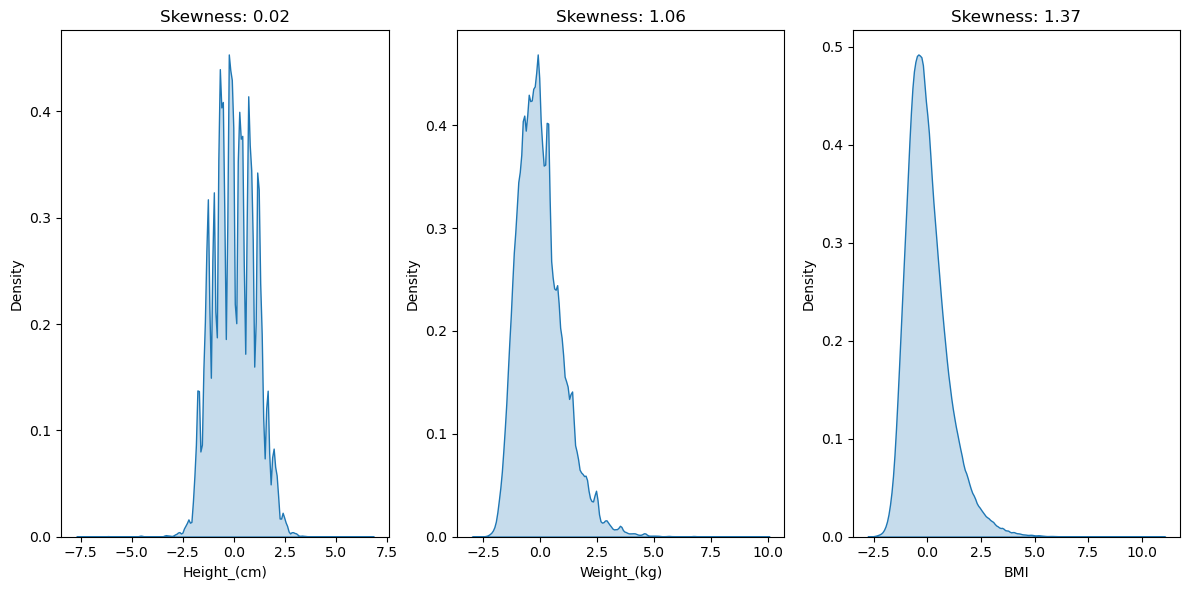

In [59]:
#Distribution before Transformation we can see that there is skewness in the columns
t=1
plt.figure(figsize=(12,6))
for i in ['Height_(cm)','Weight_(kg)','BMI']:
    plt.subplot(1,3,t)
    sns.kdeplot(data=x_train,x=i,fill=True)
    plt.title(f'Skewness: {round(x_train[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [60]:
pt = PowerTransformer(standardize=False)
#we dont want to standardize the data
x_train[['Height_(cm)','Weight_(kg)','BMI']]=pt.fit_transform(x_train[['Height_(cm)','Weight_(kg)','BMI']])
x_test[['Height_(cm)','Weight_(kg)','BMI']]=pt.transform(x_test[['Height_(cm)','Weight_(kg)','BMI']])

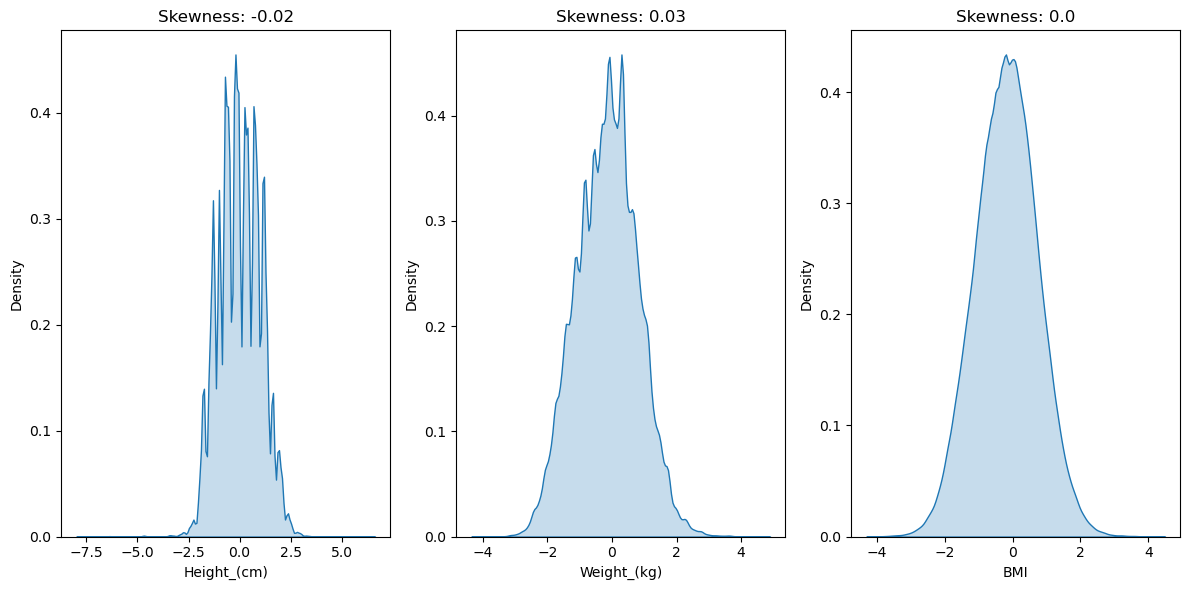

In [61]:

t=1
plt.figure(figsize=(12,6))
for i in ['Height_(cm)','Weight_(kg)','BMI']:
    plt.subplot(1,3,t)
    sns.kdeplot(data=x_train,x=i,fill=True)
    plt.title(f'Skewness: {round(x_train[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [62]:
pt.lambdas_

array([0.97465152, 0.51292585, 0.40738308])

In [63]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262508 entries, 9718 to 100885
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                262508 non-null  int64  
 1   Checkup                       262508 non-null  int64  
 2   Diabetes                      262508 non-null  int64  
 3   Height_(cm)                   262508 non-null  float64
 4   Martial_status                262508 non-null  float64
 5   Weight_(kg)                   262508 non-null  float64
 6   BMI                           262508 non-null  float64
 7   Blood_gp                      262508 non-null  int64  
 8   Alcohol_Consumption           262508 non-null  int32  
 9   Fruit_Consumption             262508 non-null  int32  
 10  Green_Vegetables_Consumption  262508 non-null  int32  
 11  Friedfood_consumption         262508 non-null  int32  
 12  Vaccinated_1.0                262508 non-null 

### Modeling

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier,
                              GradientBoostingClassifier,VotingClassifier,StackingClassifier)
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score,precision_recall_curve,recall_score,f1_score,precision_score,
                             cohen_kappa_score,confusion_matrix,classification_report,roc_auc_score,roc_curve)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from lightgbm import LGBMClassifier

In [65]:
smote = SMOTE(random_state=2)

In [66]:
x_train,y_train = smote.fit_resample(x_train,y_train)

In [67]:
#Create a function to validate models

m = []
acu = []
rec = []
pre = []
f1 = []
kap = []

#Create a function to validate models

m = []
acu = []
rec = []
pre = []
f1 = []
kap = []
recall=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    mod = model
    mod.fit(xtrain,ytrain)
    pred_s = mod.predict_proba(xtest)[:,1]
    pred_h = mod.predict(xtest)
    
    print(confusion_matrix(ytest,pred_h))
    print(classification_report(ytest,pred_h))
    
    
    fpr,tpr,thres = roc_curve(ytest,pred_s)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red',ls='--')
    plt.title(f'ROC AUC: {round(roc_auc_score(ytest,pred_s),3)}')
    plt.show()
    
    response = input('Do you want to save this model? Y/N')
    if response.lower() == 'y':
        global scorecard
        m.append(str(model))
        acu.append(accuracy_score(y_test,pred_h))
        rec.append(recall_score(y_test,pred_h))
        pre.append(precision_score(y_test,pred_h))
        f1.append(f1_score(y_test,pred_h))
        kap.append(cohen_kappa_score(y_test,pred_h))
        recall.append(recall_score(y_test,pred_h))
        
        #lets create a data frame
        scorecard = pd.DataFrame({'Model':m,'Accuracy':acu,'Precision':pre,'F1-Score':f1,'Cohen-Kappa':kap,'Recall':recall})
    else:
        return

### Logistic Regression (Base Model)

[[33347  9148]
 [  782  3048]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     42495
           1       0.25      0.80      0.38      3830

    accuracy                           0.79     46325
   macro avg       0.61      0.79      0.63     46325
weighted avg       0.92      0.79      0.83     46325



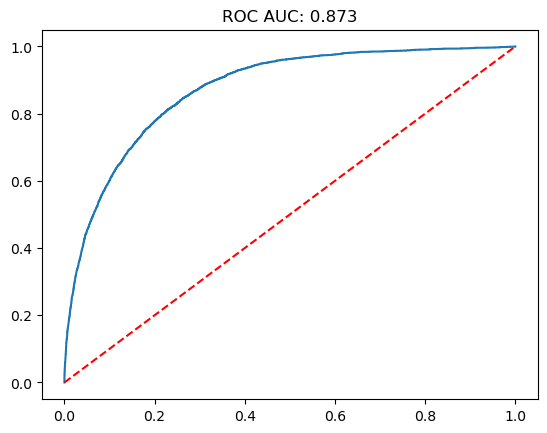

In [68]:
model_validation(LogisticRegression(class_weight='balanced'),x_train,y_train,x_test,y_test)

### Navie Bayes

[[31643 10852]
 [  576  3254]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85     42495
           1       0.23      0.85      0.36      3830

    accuracy                           0.75     46325
   macro avg       0.61      0.80      0.60     46325
weighted avg       0.92      0.75      0.81     46325



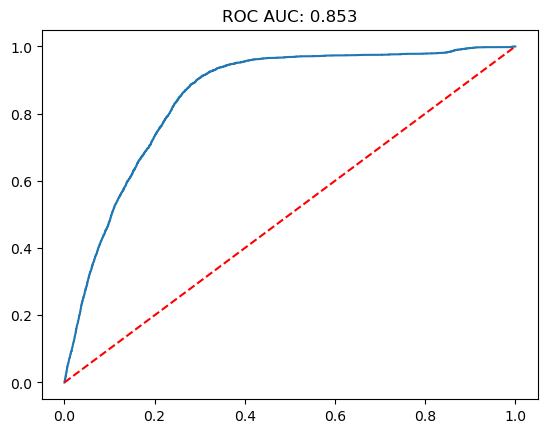

In [69]:
model_validation(GaussianNB(),x_train,y_train,x_test,y_test)

### Decision Tree

[[35555  6940]
 [  747  3083]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     42495
           1       0.31      0.80      0.45      3830

    accuracy                           0.83     46325
   macro avg       0.64      0.82      0.67     46325
weighted avg       0.92      0.83      0.86     46325



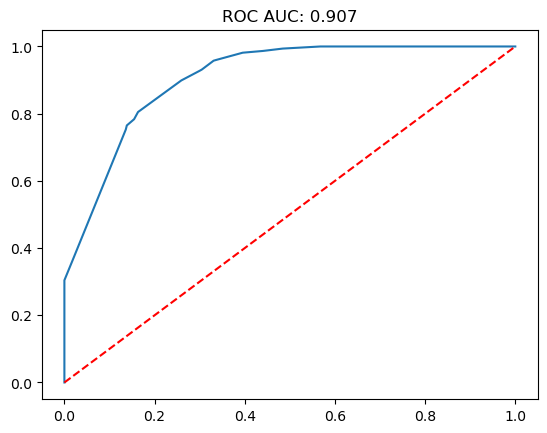

In [70]:
model_validation(DecisionTreeClassifier(max_depth=5, class_weight='balanced'),x_train,y_train,x_test,y_test)

[[39803  2692]
 [ 1670  2160]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42495
           1       0.45      0.56      0.50      3830

    accuracy                           0.91     46325
   macro avg       0.70      0.75      0.72     46325
weighted avg       0.92      0.91      0.91     46325



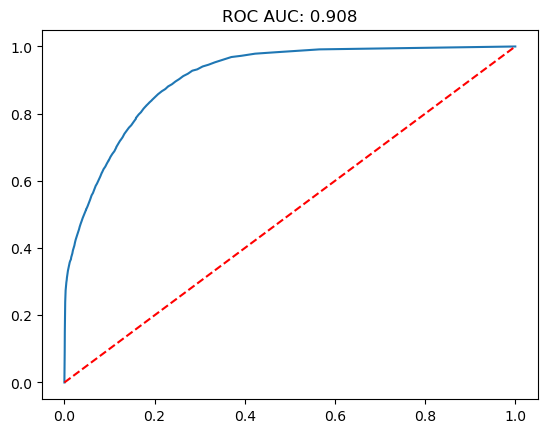

In [71]:
model_validation(RandomForestClassifier(),x_train,y_train,x_test,y_test)

[[35400  7095]
 [  859  2971]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     42495
           1       0.30      0.78      0.43      3830

    accuracy                           0.83     46325
   macro avg       0.64      0.80      0.66     46325
weighted avg       0.92      0.83      0.86     46325



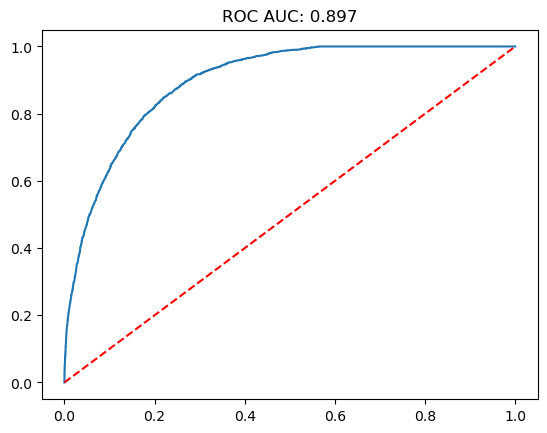

In [72]:
model_validation(AdaBoostClassifier(n_estimators=150),x_train,y_train,x_test,y_test)

[14:01:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[[41229  1266]
 [ 2011  1819]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     42495
           1       0.59      0.47      0.53      3830

    accuracy                           0.93     46325
   macro avg       0.77      0.72      0.74     46325
weighted avg       0.92      0.93      0.93     46325



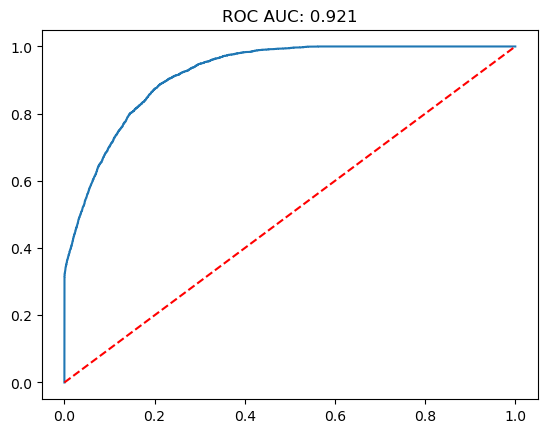

In [73]:
model_validation(XGBClassifier(n_estimators=100,max_depth=6,gamma=2, class_weight='balanced'),x_train,y_train,x_test,y_test)

[[35889  6606]
 [  799  3031]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91     42495
           1       0.31      0.79      0.45      3830

    accuracy                           0.84     46325
   macro avg       0.65      0.82      0.68     46325
weighted avg       0.92      0.84      0.87     46325



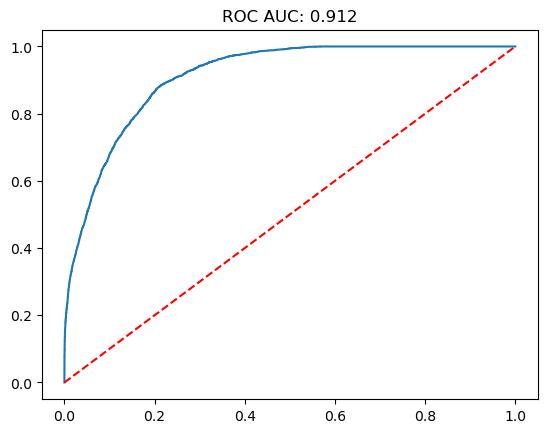

In [74]:
model_validation(GradientBoostingClassifier(),x_train,y_train,x_test,y_test)

[LightGBM] [Info] Number of positive: 241368, number of negative: 241368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 482736, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[40069  2426]
 [ 1588  2242]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42495
           1       0.48      0.59      0.53      3830

    accuracy                           0.91     46325
   macro avg       0.72      0.76      0.74     46325
weighted avg       0.92      0.91      0.92     46325



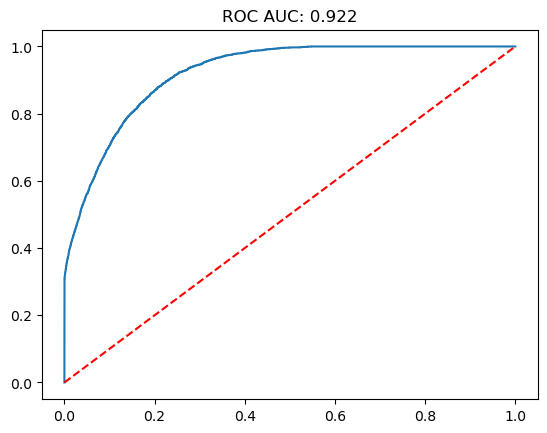

In [75]:
model_validation(LGBMClassifier(class_weight= 'balanced' ),x_train,y_train,x_test,y_test)

Learning rate set to 0.144171
0:	learn: 0.4894263	total: 265ms	remaining: 4m 24s
1:	learn: 0.4200784	total: 343ms	remaining: 2m 51s
2:	learn: 0.3856888	total: 406ms	remaining: 2m 15s
3:	learn: 0.3623249	total: 471ms	remaining: 1m 57s
4:	learn: 0.3500540	total: 530ms	remaining: 1m 45s
5:	learn: 0.3319131	total: 586ms	remaining: 1m 37s
6:	learn: 0.3257031	total: 640ms	remaining: 1m 30s
7:	learn: 0.3171065	total: 696ms	remaining: 1m 26s
8:	learn: 0.3088892	total: 755ms	remaining: 1m 23s
9:	learn: 0.3060484	total: 817ms	remaining: 1m 20s
10:	learn: 0.3036417	total: 865ms	remaining: 1m 17s
11:	learn: 0.2994849	total: 925ms	remaining: 1m 16s
12:	learn: 0.2931892	total: 978ms	remaining: 1m 14s
13:	learn: 0.2896097	total: 1.03s	remaining: 1m 12s
14:	learn: 0.2837705	total: 1.09s	remaining: 1m 11s
15:	learn: 0.2753460	total: 1.15s	remaining: 1m 11s
16:	learn: 0.2652604	total: 1.22s	remaining: 1m 10s
17:	learn: 0.2565459	total: 1.29s	remaining: 1m 10s
18:	learn: 0.2541372	total: 1.35s	remaining:

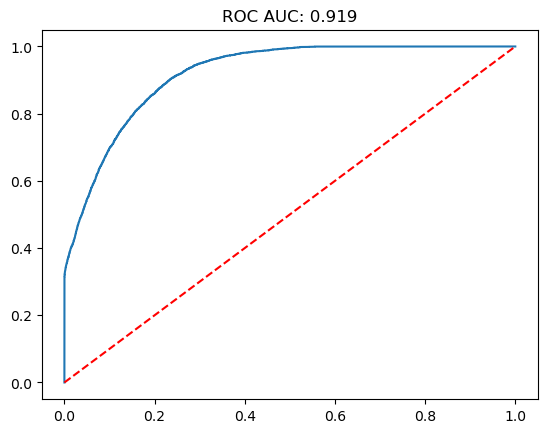

In [77]:
model_validation(CatBoostClassifier(),x_train,y_train,x_test,y_test)

[LightGBM] [Info] Number of positive: 241368, number of negative: 241368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 482736, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[[37839  4656]
 [ 1079  2751]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     42495
           1       0.37      0.72      0.49      3830

    accuracy                           0.88     46325
   macro avg       0.67      0.80      0.71     46325
weighted avg       0.92      0.88      0.89     46325



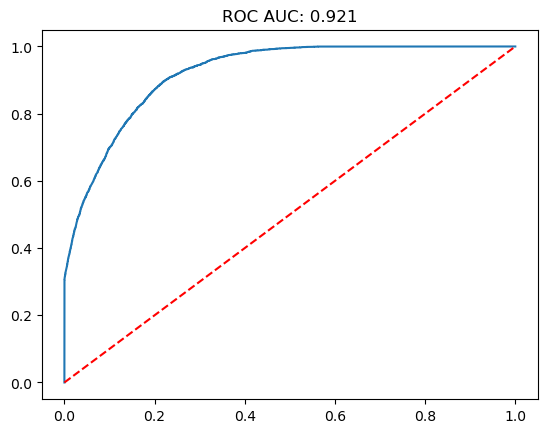

In [78]:
model_validation(LGBMClassifier(class_weight= 'balanced', n_estimators=500, max_depth= 10, learning_rate=0.01 ),x_train,y_train,x_test,y_test)

In [79]:
scorecard

,Model,Accuracy,Precision,F1-Score,Cohen-Kappa,Recall
0,LogisticRegression(class_weight='balanced'),0.785645,0.249918,0.380382,0.291188,0.795822
1,GaussianNB(),0.753308,0.230682,0.362846,0.267601,0.849608
2,DecisionTreeClassifier(class_weight='balanced'...,0.834064,0.307593,0.445102,0.369694,0.804961
3,RandomForestClassifier(),0.905839,0.445177,0.497581,0.446426,0.563969
4,AdaBoostClassifier(n_estimators=150),0.828300,0.295152,0.427605,0.349715,0.775718
5,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.929261,0.589627,0.526103,0.488359,0.474935
6,GradientBoostingClassifier(),0.840151,0.314517,0.450137,0.376342,0.791384
7,LGBMClassifier(class_weight='balanced'),0.913351,0.480291,0.527654,0.480464,0.585379
8,<catboost.core.CatBoostClassifier object at 0x...,0.927598,0.575126,0.520720,0.481941,0.475718
9,"LGBMClassifier(class_weight='balanced', learni...",0.876201,0.371405,0.489632,0.427200,0.718277


## Final Model Creation 


In [86]:
final_model = LGBMClassifier(class_weight='balanced',n_estimators=100)
final_model.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 241368, number of negative: 241368
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 482736, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced')

In [83]:
# Fiited Model and transformer saving

import pickle

In [84]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)
    

In [85]:
with open('transformer.pkl', 'wb') as file:
    pickle.dump(pt, file)

In [92]:
df = pd.DataFrame({'Columns' : x_train.columns, 'SCORE' : final_model.feature_importances_, 'Percentage' : (final_model.feature_importances_/final_model.feature_importances_.sum())*100})

In [93]:
df.sort_values(by = 'Percentage', ascending= False)

,Columns,SCORE,Percentage
3,Height_(cm),1327,44.233333
5,Weight_(kg),671,22.366667
0,General_Health,172,5.733333
7,Blood_gp,152,5.066667
21,Age_Category_Encoded,105,3.500000
6,BMI,84,2.800000
1,Checkup,78,2.600000
18,Smoking_History_Yes,59,1.966667
20,Sex_Male,48,1.600000
14,Diet_Pref_Veg,43,1.433333
